# Exercise 3

Here, we want to view spatial data in the context of a certain ground station. One of note is `Poker Flats`

Here's a movie of the Poker Flats All-Sky Camera for this date
http://optics.gi.alaska.edu/realtime/data/MPEG/PKR_DASC_256/2017/PKR_DASC_20170907_rgb.mpg

And this is how the Poker Flat spectrometer keogram looked:
http://optics.gi.alaska.edu/realtime/data/PKR_DMSP/Keo_15hr/Keo_15hr/2017/PKR_Keo_15hr_2017-09-07.png

Here is a list of relevant steps:

1. Get AMGeO Data for a specific day
2. Convert Poker Flat's glat/glon to Magnetic coordinates (using [apexpy](https://apexpy.readthedocs.io/en/develop/)) 
3. Get AMGeO Data Variable of interest over poker flats using selection based on poker flats magnetic coords
4. Plot AMGeO data over poker flats time series

If up for a challenge, and want to make some cool plots with Cartopy...

1. Map AMGeO Magnetic coordinates to Geodetic (can use helper function from util `get_amgeo_geodetic_coords`)
2. Plot AMGeO Electric potential over Northern Hemisphere plot in Cartopy
3. Plot Poker Flats station on Northern Hemisphere

In [1]:
# for reference, here is the geodetic latitude and longitude of Poker Flats

pf_glat = 65.12
pf_glon = -147.47

In [2]:
# Ignore uunecessary warnings from AMGeO dependencies
import warnings
warnings.filterwarnings('ignore')

# python's datetime module
from datetime import datetime, date

# matplotlib tools
import matplotlib.pyplot as plt
import numpy as np

# cartopy
import cartopy.crs as crs

from apexpy import Apex

In [3]:
from AMGeO.api import AMGeOApi

api = AMGeOApi()

api.set_output_dir('./amgeo_out')

controller = api.get_controller()

ds = controller.load(date(2017,9,7),'N')

Solar wind data files will be saved to /home/jovyan/.local/share/nasaomnireader

------------IMPORTANT----------------------------
Unable to import spacepy. Will fall back to
using Omni text files, which may have slightly
different data and incomplete metadata
-------------------------------------------------



In [4]:
ds

<xarray.Dataset>
Dimensions:         (time: 288, lat: 24, lon: 37)
Coordinates:
  * time            (time) datetime64[ns] 2017-09-07T00:02:30 ... 2017-09-07T...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables: (12/13)
    E_ph            (time, lat, lon) float64 -0.01376 -0.01442 ... -0.0001178
    E_th            (time, lat, lon) float64 0.007904 0.005825 ... -7.189e-06
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 4.715e+03 5.192e+03 ... 1.129e+03
    int_joule_heat  (time) float64 13.63 15.22 19.02 16.76 ... 265.5 198.9 207.9
    ...              ...
    joule_heat      (time, lat, lon) float64 1.007 0.9673 ... 5.567e-05
    mpot            (time, lat, lon) float64 1.881 1.617 1.361 ... -1.55 -2.035
    sdB_ph          (time, lat, lon) float64 -28.92 -32.22 ... 2.262 3.546
    sdB_th          (time, lat, lon) float64 25.34 18.17 9.523 ... 3.866 3.898
    v_ph            (time, lat, lon) float64 134.5 99.11 ... 0.4663 -0.1472
    v_th            (time, lat, lon) float64 234.1 245.3 245.5 ... 0.2928 2.411
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N

In [5]:
import util

In [6]:
# for reference, here is the geodetic latitude and longitude of Poker Flats
pf_glat = 65.12
pf_glon = -147.47

apex = Apex(datetime(2017,9,7),refh=110.)

pf_mlats = np.zeros((ds.time.values.size,))
pf_mltlons = np.zeros((ds.time.values.size,))
for i,dt64 in enumerate(ds.time.values):
    dt = util.datetime64_to_datetime(dt64)
    pf_mlat,pf_mlt = apex.convert(pf_glat,pf_glon,'geo','mlt',height=1,datetime=dt)
    pf_mlats[i] = pf_mlat
    pf_mltlons[i] = pf_mlt/12*180.
    

In [7]:
dt = util.datetime64_to_datetime(dt64)


In [8]:
#We can use XArray's sel method to extract the closest AMGeO data
pf_epots = np.zeros((ds.time.values.size,))
for i,dt64 in enumerate(ds.time.values):
    dt = util.datetime64_to_datetime(dt64)
    this_gs_ds = ds.sel({'lat':pf_mlats[i],'lon':pf_mltlons[i],'time':dt},method='nearest')
    print(this_gs_ds)
    print(pf_mlats[i],pf_mltlons[i])
    #pf_epots[i] = np.sqrt(this_gs_ds['E_th'].values**2+this_gs_ds['E_ph'].values**2)
    pf_epots[i] = this_gs_ds['epot'].values

<xarray.Dataset>
Dimensions:         ()
Coordinates:
    time            datetime64[ns] 2017-09-07T00:02:30
    lat             float64 65.0
    lon             float64 200.0
Data variables: (12/13)
    E_ph            float64 -4.03e-05
    E_th            float64 -0.002162
    cond_hall       float64 9.199
    cond_ped        float64 7.548
    epot            float64 -408.0
    int_joule_heat  float64 13.63
    ...              ...
    joule_heat      float64 0.03531
    mpot            float64 5.433
    sdB_ph          float64 2.7
    sdB_th          float64 -26.0
    v_ph            float64 -39.53
    v_th            float64 0.7365
Attributes:
    description:  AMGeO Assimilative Maps
    version:      v2_beta
    hemisphere:   N
65.074462890625 197.09885406494138
<xarray.Dataset>
Dimensions:         ()
Coordinates:
    time            datetime64[ns] 2017-09-07T00:07:30
    lat             float64 65.0
    lon             float64 200.0
Data variables: (12/13)
    E_ph            flo

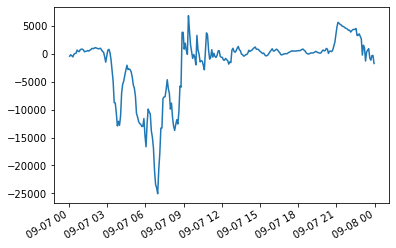

In [9]:
f=plt.figure()
ax=f.add_subplot(111)
ax.plot(ds.time,pf_epots)
f.autofmt_xdate()

In [10]:
ds.lon

<xarray.DataArray 'lon' (lon: 37)>
array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200., 210., 220., 230.,
       240., 250., 260., 270., 280., 290., 300., 310., 320., 330., 340., 350.,
       360.])
Coordinates:
  * lon      (lon) float64 0.0 10.0 20.0 30.0 40.0 ... 330.0 340.0 350.0 360.0
Attributes:
    longname:   Magnetic Local Time in Degrees
    shortname:  lons
    units:      degrees

In [11]:
amgeo_lats,amgeo_mltlons = np.meshgrid(ds.lat.values,ds.lon.values,indexing='ij')

In [12]:
# need to create 24x37 grid of lat & lons for conversion
amgeo_lats, amgeo_lons = np.zeros((24, 37)), np.zeros((24, 37))
for i in range(24):
    for j in range(37):
        amgeo_lats[i][j] = ds.lat.values[i]
        amgeo_lons[i][j] = ds.lon.values[j]
amgeo_lats, amgeo_lons = np.array(amgeo_lats), np.array(amgeo_lons)
amgeo_lats.shape, amgeo_lons.shape

# NOTE: AMGeO lons are mlt in degrees, so simple transform to move to apex mlt
mlt = amgeo_lons / 180 * 12

In [13]:
#Iterate across times
n_times = ds['time'].shape[0]
geo_lats = np.zeros((n_times,24,37))
geo_lons = np.zeros((n_times,24,37))

amgeo_lats,amgeo_mltlons = np.meshgrid(ds.lat.values,ds.lon.values,indexing='ij')

for i in range(n_times):
    #Choose the i-th time from the Dataset
    dt64 = ds['time'].values[i]
    
    #Convert between time formats
    dt = util.datetime64_to_datetime(dt64)

    geo_lat, geo_lon = apex.convert(amgeo_lats, mlt, 'mlt', 'geo', datetime=dt, height=1)
    
    geo_lats[i,...]=geo_lat
    geo_lons[i,...]=geo_lon
    

In [14]:
ds['geo_lat']=(('time','lat','lon'),geo_lats)
ds['geo_lon']=(('time','lat','lon'),geo_lons)


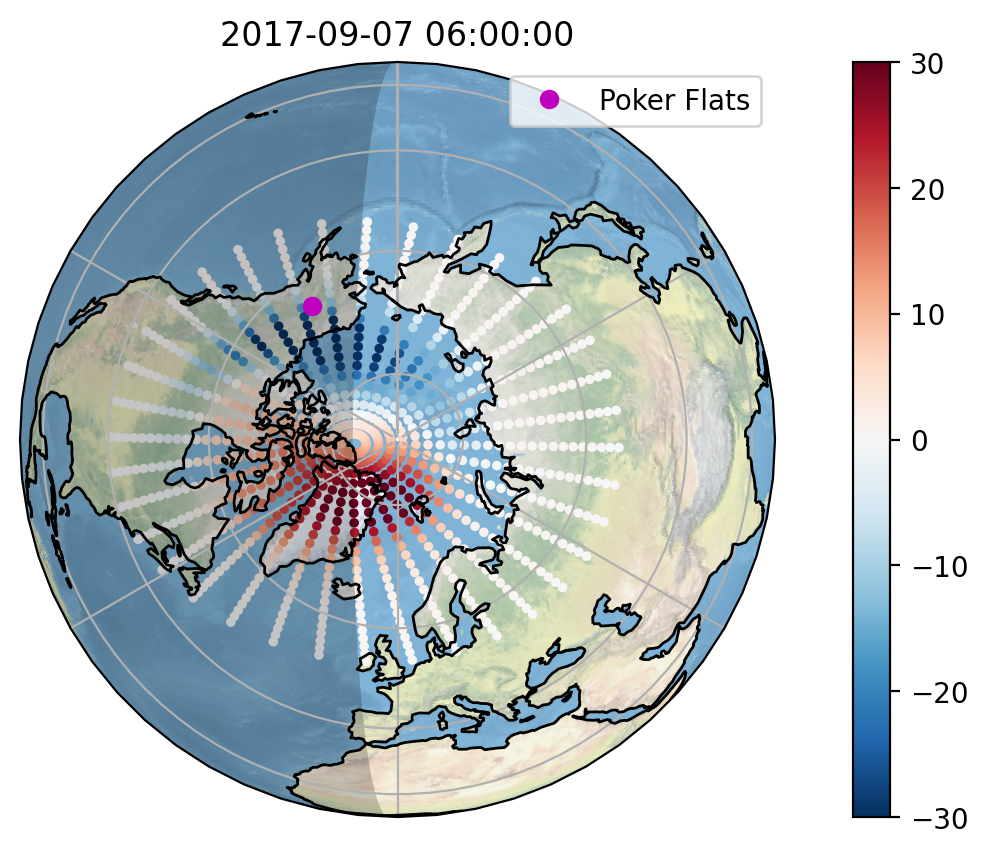

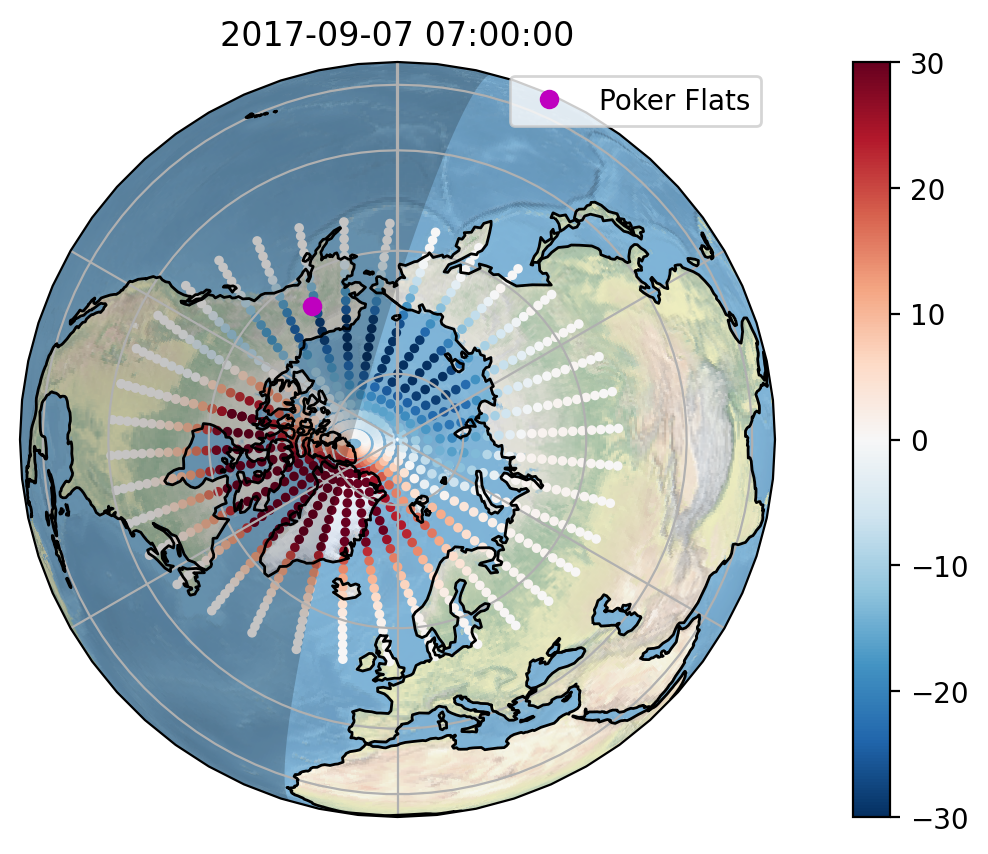

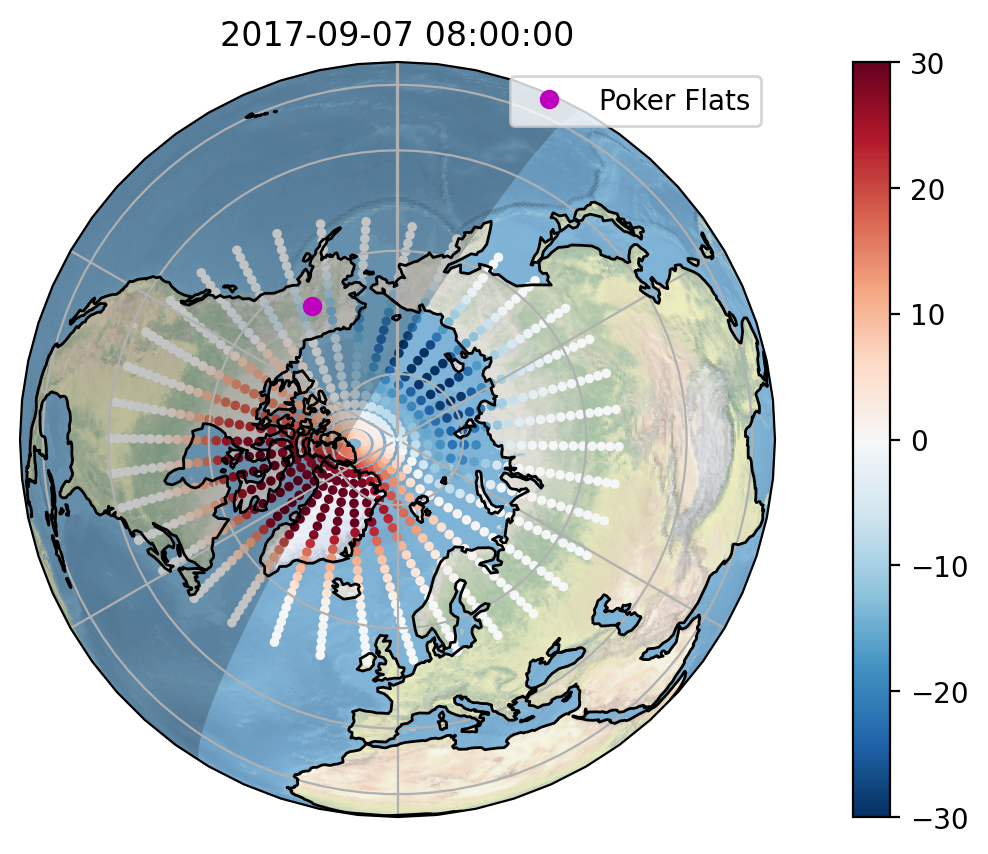

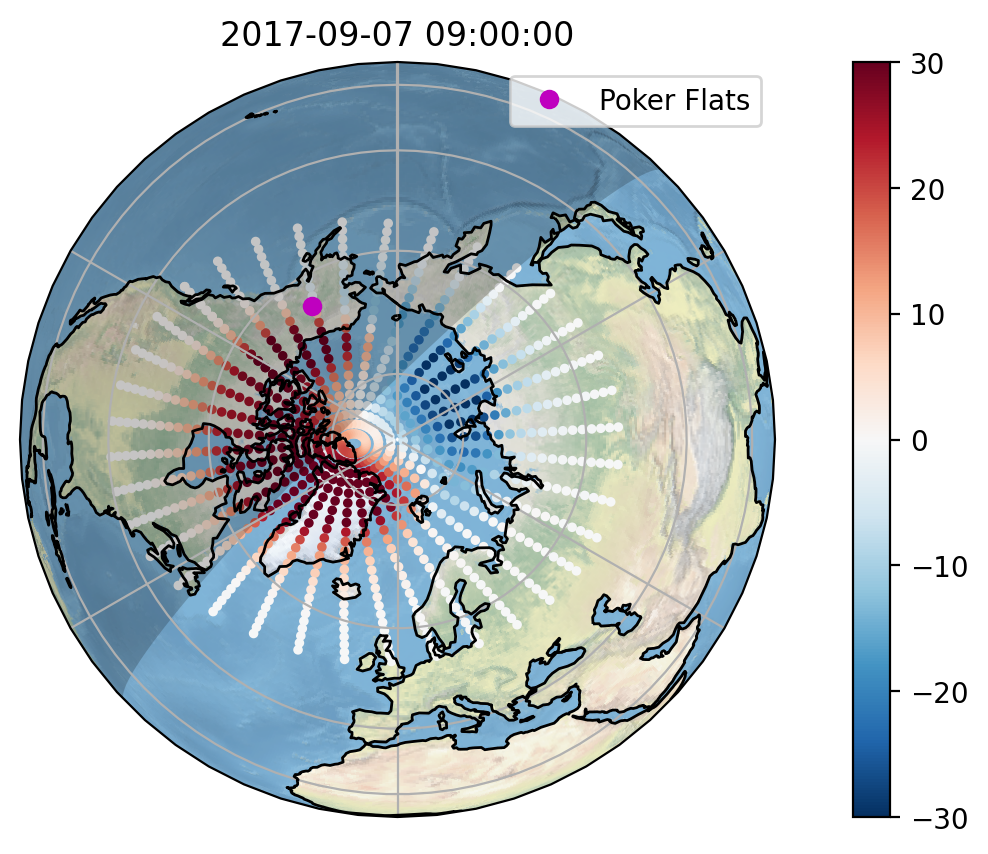

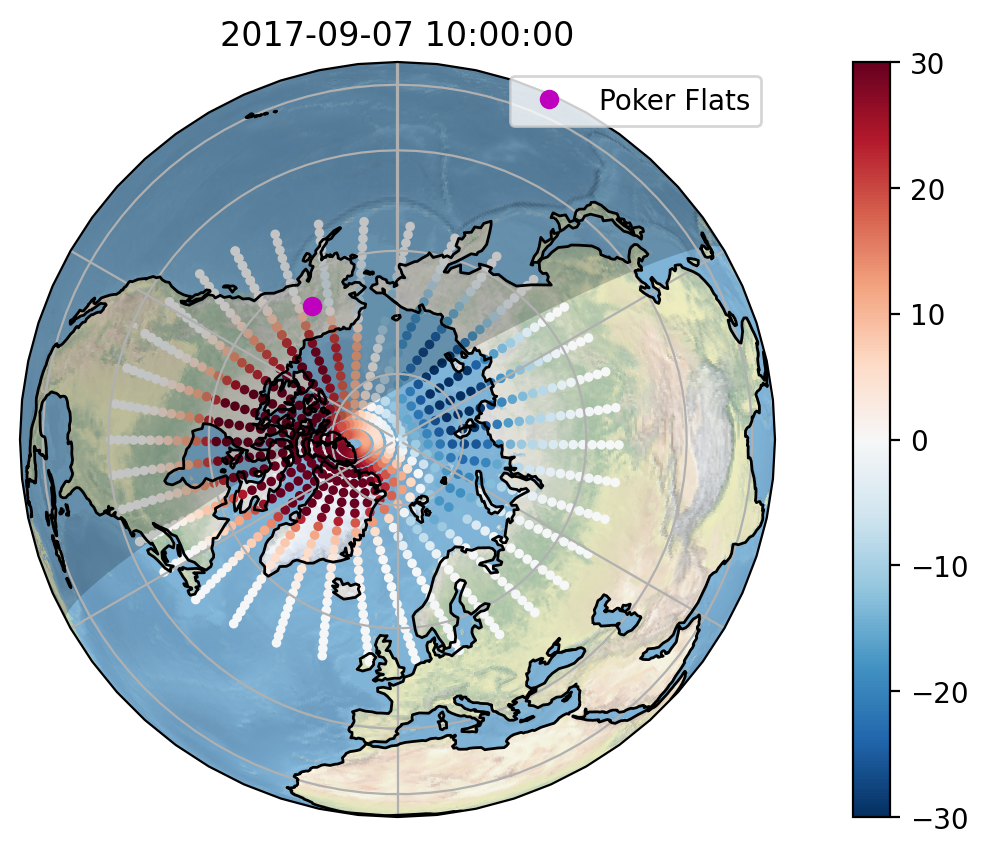

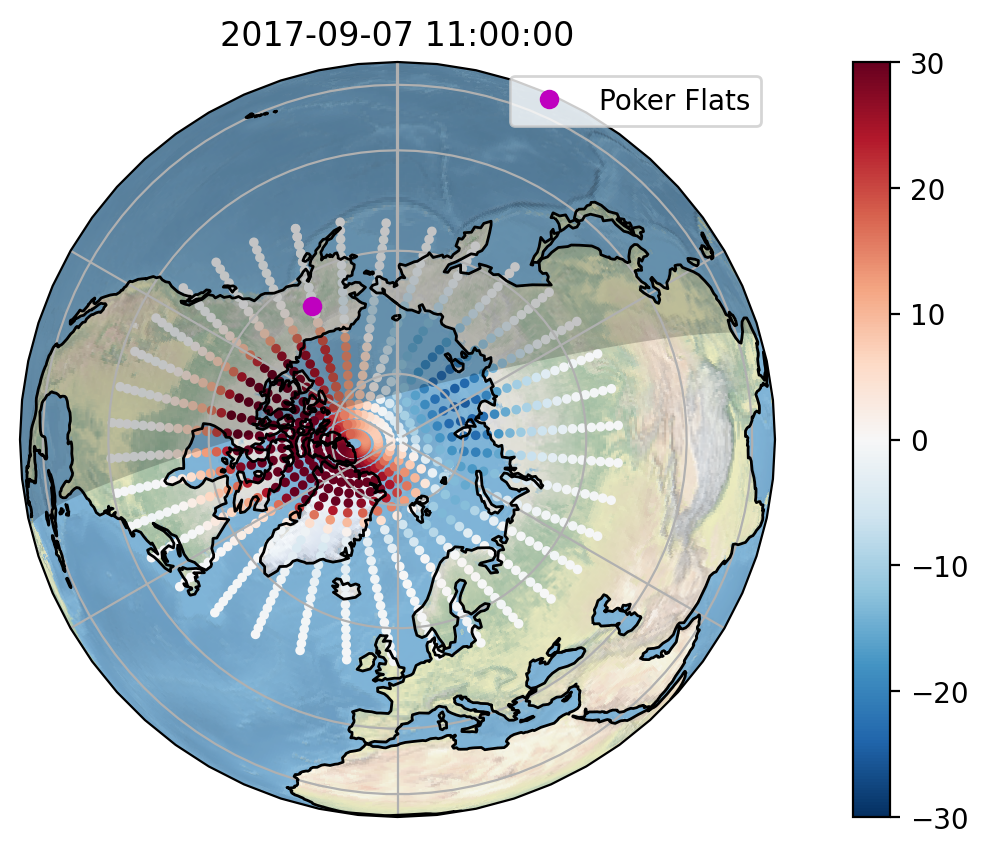

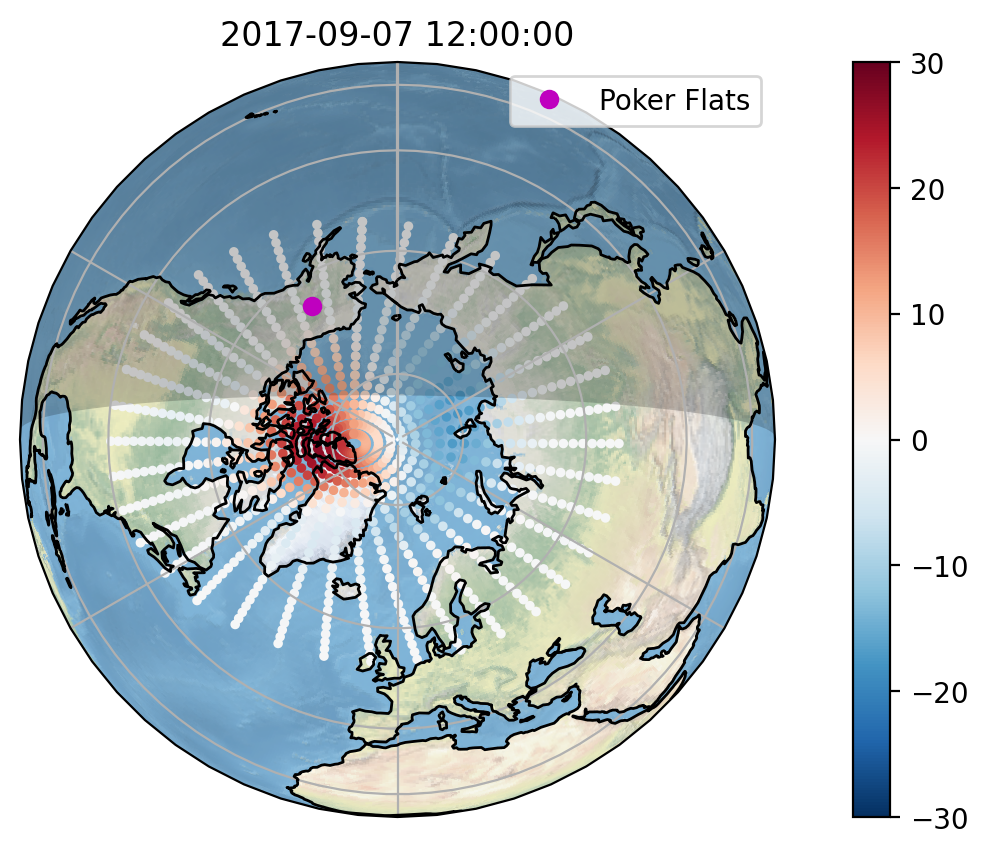

In [15]:
# cartopy
import cartopy.crs as crs
from cartopy.feature.nightshade import Nightshade

for hour in [6,7,8,9,10,11,12]:

    this_dt = datetime(2017,9,7,hour)

    fig = plt.figure(figsize=[10, 5],dpi=200)

    # Northern Hemisphere
    ax = fig.add_subplot(1, 1, 1, projection=crs.Orthographic(0, 90))

    ax.coastlines(zorder=3)
    ax.stock_img()
    ax.gridlines()

    thisds = ds.sel({'time':this_dt},method='nearest')

    ms=6
    mappable = ax.scatter(thisds['geo_lon'],thisds['geo_lat'],ms,thisds['epot']/1000.,
               vmin=-30,vmax=30,cmap='RdBu_r',transform=crs.PlateCarree())

    ax.plot(pf_glon,pf_glat,'mo',label='Poker Flats',transform=crs.PlateCarree())
    
    ax.legend()

    ax.add_feature(Nightshade(this_dt, alpha=0.2))
    ax.set_title(f'{this_dt}')
    fig.colorbar(mappable)